### Broadcasting

In [2]:
import numpy as np

A = np.array([[56.0, 0.0, 4.4, 68.0],
              [1.2, 104.0, 52.0, 8.0],
              [1.8, 135.0, 99.0, 0.9]])

print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [6]:
vertical_sum = A.sum(axis=0) #Vertical sums
print(vertical_sum)

[ 59.  239.  155.4  76.9]


In [12]:
percentage = A/vertical_sum.reshape(1,4) # reshape is redundant here
print(percentage)


[[0.94915254 0.         0.02831403 0.88426528]
 [0.02033898 0.43514644 0.33462033 0.10403121]
 [0.03050847 0.56485356 0.63706564 0.01170351]]


In [23]:
## It is  a good idea to get rid of rank1 arrays to not run into bugs

In [9]:
a = np.random.randn(5)

In [13]:
print(a)

[-0.34192783  0.07443775  0.01721416  0.88833437 -0.14362464]


In [20]:
a.shape # nor a row nor a column vector it is a rank 1 array

(5, 1)

In [17]:
print(np.dot(a, a.T))

0.9325179434629277


In [21]:
b = np.random.randn(5, 1)
print(b)

[[-0.70874489]
 [-0.3108446 ]
 [-1.4362684 ]
 [ 0.51376402]
 [-1.88174616]]


In [22]:
print(np.dot(b, b.T))

[[ 0.50231931  0.22030952  1.01794789 -0.36412762  1.33367797]
 [ 0.22030952  0.09662437  0.44645628 -0.15970077  0.58493064]
 [ 1.01794789  0.44645628  2.06286693 -0.73790303  2.70269256]
 [-0.36412762 -0.15970077 -0.73790303  0.26395347 -0.96677348]
 [ 1.33367797  0.58493064  2.70269256 -0.96677348  3.54096862]]


## Some numpy stuff

### Sigmoid func

In [28]:
import math

def basic_sigmoid(x):
    s = 1/(1+math.exp(-x))
    return s

In [34]:
basic_sigmoid(10000)

1.0

In [35]:
basic_sigmoid(0)

0.5

In [39]:
basic_sigmoid(-100)

3.7200759760208356e-44

In [40]:
x = [1, 2, 3]

In [57]:
t_x = np.array([1, 2, 3])

In [43]:
basic_sigmoid(x) # Not gonna work, haha, x is a vector

TypeError: bad operand type for unary -: 'list'

In [54]:
# Use this instead
np.exp(t_x) # it works :)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [49]:
print(np.exp(t_x)) # sometimes i prefer print, so i wint see the "array"

[ 2.71828183  7.3890561  20.08553692]


In [58]:
#Sigmoid for a vector
def sigmoid_for_vector(x):
    s = 1/(1+np.exp(-x))
    return s 

In [62]:
sigmoid_for_vector(t_x)

array([0.73105858, 0.88079708, 0.95257413])

# impletemting the gradient for sigmoid

In [64]:
def sigmoid_derivative(x):
    s = 1/(1+np.exp(-x))
    ds = s*(1-s)
    return ds

In [65]:
sigmoid_derivative(t_x)

array([0.19661193, 0.10499359, 0.04517666])

### image to vector (CV, here we come! )

In [66]:
def image2vector(image):
    #image-- a np array 
    v = image.reshape(image.shape[0] *
                     image.shape[1] * 
                     image.shape[2])
    return v 

In [67]:
t_image = np.array([[[ 0.67826139,  0.29380381],
                     [ 0.90714982,  0.52835647],
                     [ 0.4215251 ,  0.45017551]],

                   [[ 0.92814219,  0.96677647],
                    [ 0.85304703,  0.52351845],
                    [ 0.19981397,  0.27417313]],

                   [[ 0.60659855,  0.00533165],
                    [ 0.10820313,  0.49978937],
                    [ 0.34144279,  0.94630077]]])

In [71]:
t_image.shape

(3, 3, 2)

In [70]:
print(image2vector(t_image))

[0.67826139 0.29380381 0.90714982 0.52835647 0.4215251  0.45017551
 0.92814219 0.96677647 0.85304703 0.52351845 0.19981397 0.27417313
 0.60659855 0.00533165 0.10820313 0.49978937 0.34144279 0.94630077]


In [72]:
image2vector(t_image).shape

(18,)

### Normalization. It is a good idea to use, converges faster for example

In [74]:
# we use keepdims=True so it will broadcast (right into the outer space haha)

In [84]:
def normalize_rows(x):
    # x -- numpy matrix of shape (n, m)
    x_norm = np.linalg.norm(x, axis=1, keepdims=True)
    print(x_norm.shape)  #Surprise :) 
    x = x / x_norm
    return x

In [85]:
x = np.array([[0., 3., 4.],
              [1., 6., 4.]])

In [86]:
x.shape

(2, 3)

In [87]:
normalize_rows(x)

(2, 1)


array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

In [88]:
normalize_rows(x).shape

(2, 1)


(2, 3)

# Softmax (very easy, very important)

In [90]:
def softmax(x):
    # x -- numpy matrix of shape (m, n)
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp/x_sum
    return s 

In [92]:
t_x = np.array([[9, 2, 5, 0, 0],
                [7, 5, 0, 0 ,0]])
softmax(t_x)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])

# LOSS Function 

- L1 
$$\begin{align*} & L_1(\hat{y}, y) = \sum_{i=0}^{m-1}|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [94]:
def L1(yhat, y):
    loss = np.sum(np.abs(y - yhat))
    return loss

In [102]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print(L1(yhat, y))

1.1


In [101]:
yhat = np.array([1, 0, 0, 1, 1])
y = np.array([10, 10, 10, 10, 10])
print(L1(yhat, y))

47


- L2:
  $$\begin{align*} & L_2(\hat{y},y) = \sum_{i=0}^{m-1}(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [99]:
def L2(yhat, y):
    loss = np.sum(np.dot(y-yhat, y-yhat))
    return loss

In [103]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print(L2(yhat, y))

0.43000000000000005


In [104]:
yhat = np.array([1, 0, 0, 1, 1])
y = np.array([10, 10, 10, 10, 10])
print(L2(yhat, y))

443


## Logistic regression again, but more deeply

In [3]:
! pip install tensorflow tensorflow_datasets

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 827.6 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.4/165.4 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 4.2 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21483 sha256=bafdb4aaba1b219c0a7130f67c4f3e980b305e8931150f7f7211582c4e15f812
  Stored in directory: /Users/robertbaburin/Library/Caches/pip/wheels/54/4e/28/3ed0e1c8a752867445bab994d2340724928aa3ab059c57c8db
Successfully built promise


In [1]:
pip install --upgrade ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 214.4/214.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.2
    Uninstalling widgetsnbextension-3.5.2:
      Successfully uninstalled widgetsnbextension-3.5.2
  Attempting uninstall: jupyterlab-widgets
    Found existing installation: jupyterlab-widgets 3.0.10
    Uninstalling jupyterlab-widgets-3.0.10:
      Successfully uninstalled jupyterlab-widgets-3.0.10
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.6.5
    Uninstalling ipywidgets-7.6.5:
      Successfully uninstalled ipywidgets-7.6.5
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import copy


In [4]:
# ! pip install ipywidgets==7.6.5

In [5]:
dataset, info = tfds.load('cats_vs_dogs', with_info=True, as_supervised=True)

In [8]:
dataset

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [9]:
# Define preprocessing function
def preprocess(image, label):
    image = tf.image.resize(image, [num_px, num_px])
    image = image / 255.0  # Normalize pixel values
    return image, label

In [10]:
def preprocess_image(image, label, num_px):
    """
    Resizes and normalizes an image.
    
    Args:
        image: The image tensor.
        label: The label tensor.
        num_px: The desired size for the image (num_px x num_px).
    
    Returns:
        A tuple of (processed image, label).
    """
    image = tf.image.resize(image, [num_px, num_px])  # Resize to num_px x num_px
    image = image / 255.0  # Normalize pixel values to [0, 1]
    return image, label

In [11]:
def dataset_to_numpy(dataset, num_px):
    """
    Converts a TensorFlow dataset into NumPy arrays.
    
    Args:
        dataset: The TensorFlow dataset object.
        num_px: The desired image size (num_px x num_px).
    
    Returns:
        images: NumPy array of images.
        labels: NumPy array of labels.
    """
    images, labels = [], []
    for image, label in dataset.map(lambda img, lbl: preprocess_image(img, lbl, num_px)):
        images.append(image.numpy())
        labels.append(label.numpy())
    
    images = np.array(images)  
    labels = np.array(labels).reshape(1, -1)  
    return images, labels

In [12]:

def split_dataset(images, labels, split_ratio=0.9):
    """
    Splits the dataset into training and test sets.
    
    Args:
        images: NumPy array of images.
        labels: NumPy array of labels.
        split_ratio: Proportion of the dataset to use for training.
    
    Returns:
        train_set_x_orig: Training images.
        train_set_y: Training labels.
        test_set_x_orig: Test images.
        test_set_y: Test labels.
    """
    split_idx = int(split_ratio * len(images))
    train_set_x_orig = images[:split_idx]
    train_set_y = labels[:, :split_idx]
    test_set_x_orig = images[split_idx:]
    test_set_y = labels[:, split_idx:]
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y

In [13]:
def preprocess_and_split(dataset, num_px=224):
    """
    Main function to preprocess and split the dataset.
    
    Args:
        dataset: The TensorFlow dataset object.
        num_px: The desired image size (num_px x num_px).
    
    Returns:
        train_set_x_orig: Training images.
        train_set_y: Training labels.
        test_set_x_orig: Test images.
        test_set_y: Test labels.
        classes: Class labels as a NumPy array.
        m_train: Number of training examples.
        m_test: Number of test examples.
        num_px: Size of each image (height/width).
    """
    images, labels = dataset_to_numpy(dataset['train'], num_px)
    
    train_set_x_orig, train_set_y, test_set_x_orig, test_set_y = split_dataset(images, labels)
    
    classes = np.array(['cat', 'dog'])
    
    m_train = train_set_y.shape[1]
    m_test = test_set_y.shape[1]
    
    return train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes, m_train, m_test, num_px

In [14]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes, m_train, m_test, num_px = preprocess_and_split(dataset)

2025-01-18 12:14:20.609345: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:376] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-01-18 12:15:04.731371: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [15]:
print(f"Train set shape: {train_set_x_orig.shape}")
print(f"Train labels shape: {train_set_y.shape}")
print(f"Test set shape: {test_set_x_orig.shape}")
print(f"Test labels shape: {test_set_y.shape}")
print(f"Classes: {classes}")
print(f"Number of training examples: {m_train}")
print(f"Number of test examples: {m_test}")
print(f"Image size (num_px x num_px): {num_px}x{num_px}")

Train set shape: (20935, 224, 224, 3)
Train labels shape: (1, 20935)
Test set shape: (2327, 224, 224, 3)
Test labels shape: (1, 2327)
Classes: ['cat' 'dog']
Number of training examples: 20935
Number of test examples: 2327
Image size (num_px x num_px): 224x224


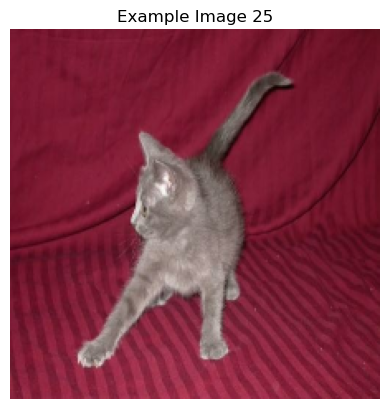

y = [0], it's a 'cat' picture.


In [16]:
index = 25
plt.imshow(train_set_x_orig[index])
plt.title(f"Example Image {index}")
plt.axis("off") 
plt.show()

label = train_set_y[:, index]
class_name = classes[np.squeeze(label)]  
print(f"y = {label}, it's a '{class_name}' picture.")

In [17]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T


In [18]:
train_set_x_flatten.shape

(150528, 20935)

In [19]:
test_set_x_flatten.shape

(150528, 2327)

In [20]:
# Let's standardize our dataset.
train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.

In [21]:
train_set_x_flatten[0]

array([0.97986144, 0.8538537 , 0.6757791 , ..., 0.85098827, 0.2548582 ,
       0.05689776], dtype=float32)

In [22]:
train_set_x[0]

array([0.00384259, 0.00334845, 0.00265011, ..., 0.00333721, 0.00099944,
       0.00022313], dtype=float32)

In [23]:
# I am using a sigmoid, but actually it might not be the best option here. 
def sigmoid(z):
    s = 1 / (1+np.exp(-z))    
    return s

In [24]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))


sigmoid([0, 2]) = [0.5        0.88079708]


In [25]:
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

[0.62245933 0.5        0.88079708]


In [26]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0.0
    return w, b

In [27]:
dim = 2
w, b = initialize_with_zeros(dim)

assert type(b) == float
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0.0


In [28]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)
    cost = - 1/m * np.sum(Y * np.log(A) + (1-Y)*np.log(1-A))

    dw = 1/m*np.dot(X, (A-Y).T)
    db = 1/m*np.sum(A-Y)
    cost = np.squeeze(np.array(cost))

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [29]:
w =  np.array([[1.], [2]])
b = 1.5

X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

assert type(grads["dw"]) == np.ndarray
assert grads["dw"].shape == (2, 1)
assert type(grads["db"]) == np.float64


print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.1250040450043965
cost = 0.15900537707692405


In [30]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [31]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009, print_cost=False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

w = [[0.80956046]
 [2.0508202 ]]
b = 1.5948713189708588
dw = [[ 0.17860505]
 [-0.04840656]]
db = -0.08888460336847771
Costs = [array(0.15900538)]


In [32]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_prediction[0,i] = 1
        else:
            Y_prediction[0,i] = 0
            
    return Y_prediction

In [33]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [34]:
from tqdm import tqdm

def model(X_train, Y_train, X_test, Y_test, num_iterations=1000, learning_rate=0.5, print_cost=False):
    w = np.zeros((X_train.shape[0], 1))
    b = 0.0
    costs = []
    
    for i in tqdm(range(num_iterations), desc="Training Progress"):
        grads, cost = propagate(w, b, X_train, Y_train) 
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - learning_rate * dw
        b = b - learning_rate * db

        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Iteration {i}: Cost = {cost:.6f}")
    
    params = {"w": w, "b": b}
    
    Y_prediction_test = predict(w, b, X_test) 
    Y_prediction_train = predict(w, b, X_train)
    
    if print_cost:
        train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
        test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
        print(f"Train accuracy: {train_accuracy:.2f}%")
        print(f"Test accuracy: {test_accuracy:.2f}%")
    
    d = {
        "costs": costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train": Y_prediction_train,
        "w": w,
        "b": b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
    }
    
    return d

In [ ]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

Training Progress:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
# Example of wrongly classified image
index = 1
plt.imshow(test_set_x[:, index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0,index]) + ", you predicted that it is a \"" + classes[int(logistic_regression_model['Y_prediction_test'][0,index])].decode("utf-8") +  "\" picture.")

In [ ]:
# Learning curve
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [ ]:
my_image = "my_test_cat_image.jpg"   

fname = "images/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T
my_predicted_image = predict(logistic_regression_model["w"], logistic_regression_model["b"], image)

print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

In [2]:
import numpy as np